In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

Load the Dataset


In [ ]:
# Define column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
# Load the dataset from URL
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
housing_df = pd.read_csv(data_url, delim_whitespace=True, header=None, names=column_names)
print("Dataset Shape:", housing_df.shape)
housing_df.head()

/tmp/ipython-input-916864293.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing_df = pd.read_csv(data_url, delim_whitespace=True, header=None, names=column_names)


Data Exploration

In [ ]:
print("Dataset Information:")
housing_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
print("Statistical Summary:")
housing_df.describe()

Statistical Summary:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(housing_df.isnull().sum())


Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


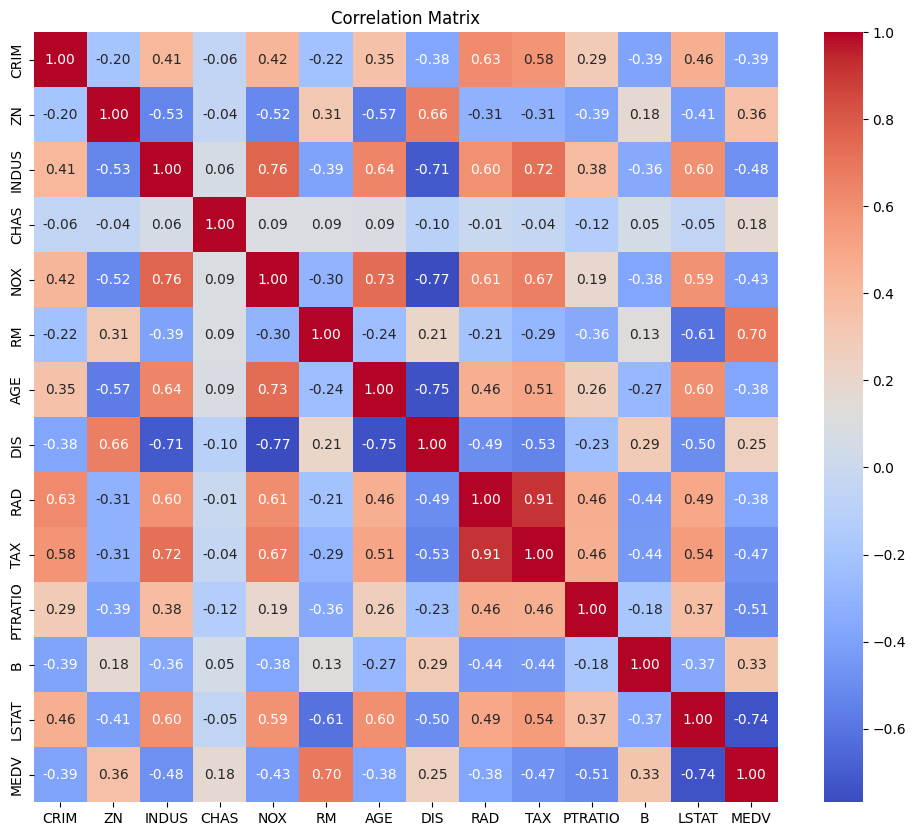

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Split the Dataset

In [ ]:
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (404, 13)
Testing set size: (102, 13)


Data Preprocessing

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Transform the test data
X_test_scaled = scaler.transform(X_test)

Train Models

In [ ]:
# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=1.0)

In [ ]:
# Train the models
linear_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)
lasso_reg.fit(X_train_scaled, y_train)

print("All models trained successfully!")

All models trained successfully!


Evaluate Models

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae
    }

# Evaluate all models
results = []
results.append(evaluate_model(linear_reg, X_test_scaled, y_test, 'Linear Regression'))
results.append(evaluate_model(ridge_reg, X_test_scaled, y_test, 'Ridge Regression'))
results.append(evaluate_model(lasso_reg, X_test_scaled, y_test, 'Lasso Regression'))

# Create a results DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,MSE,RMSE,R²,MAE
0,Linear Regression,24.291119,4.928602,0.668759,3.189092
1,Ridge Regression,24.312904,4.930812,0.668462,3.185724
2,Lasso Regression,27.577692,5.251447,0.623943,3.473770


Visual Comparison of Results

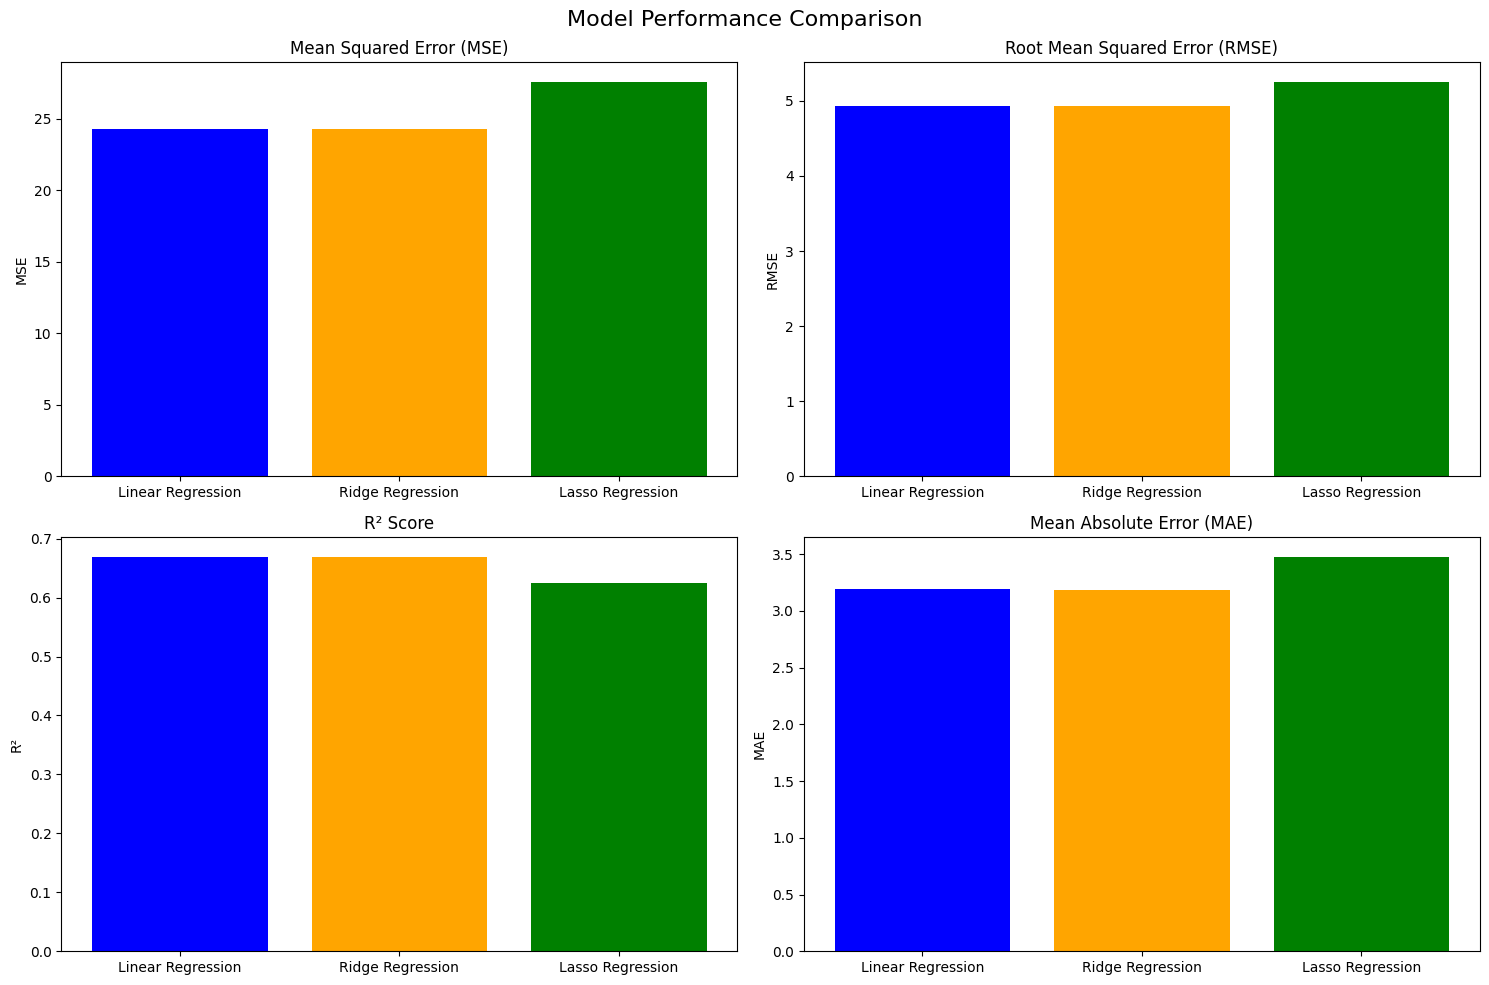

In [ ]:
# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Plot MSE
axes[0, 0].bar(results_df['Model'], results_df['MSE'], color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')

# Plot RMSE
axes[0, 1].bar(results_df['Model'], results_df['RMSE'], color=['blue', 'orange', 'green'])
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')

# Plot R²
axes[1, 0].bar(results_df['Model'], results_df['R²'], color=['blue', 'orange', 'green'])
axes[1, 0].set_title('R² Score')
axes[1, 0].set_ylabel('R²')

# Plot MAE
axes[1, 1].bar(results_df['Model'], results_df['MAE'], color=['blue', 'orange', 'green'])
axes[1, 1].set_title('Mean Absolute Error (MAE)')
axes[1, 1].set_ylabel('MAE')

plt.tight_layout()
plt.show()

ctual vs Predicted Values

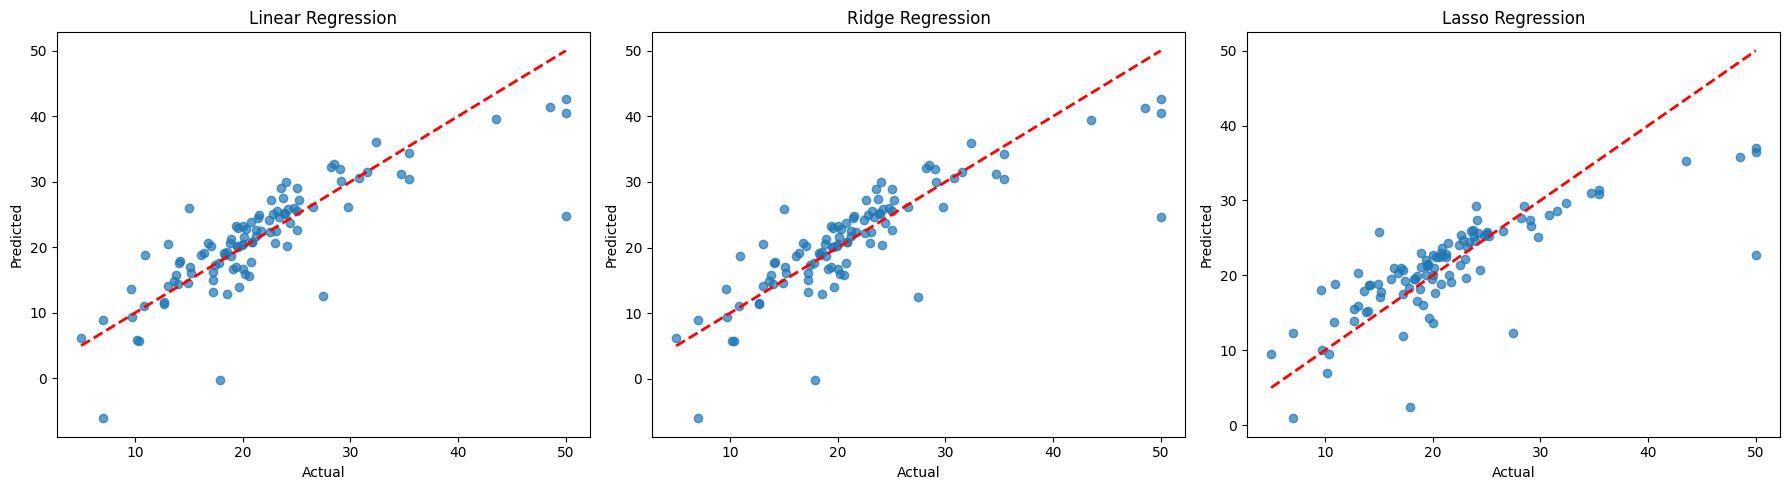

In [ ]:
# Get predictions from all models
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Linear Regression
axes[0].scatter(y_test, y_pred_linear, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Linear Regression')

# Plot for Ridge Regression
axes[1].scatter(y_test, y_pred_ridge, alpha=0.7)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Ridge Regression')

# Plot for Lasso Regression
axes[2].scatter(y_test, y_pred_lasso, alpha=0.7)
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('Predicted')
axes[2].set_title('Lasso Regression')

plt.tight_layout()
plt.show()

Residual Analysis


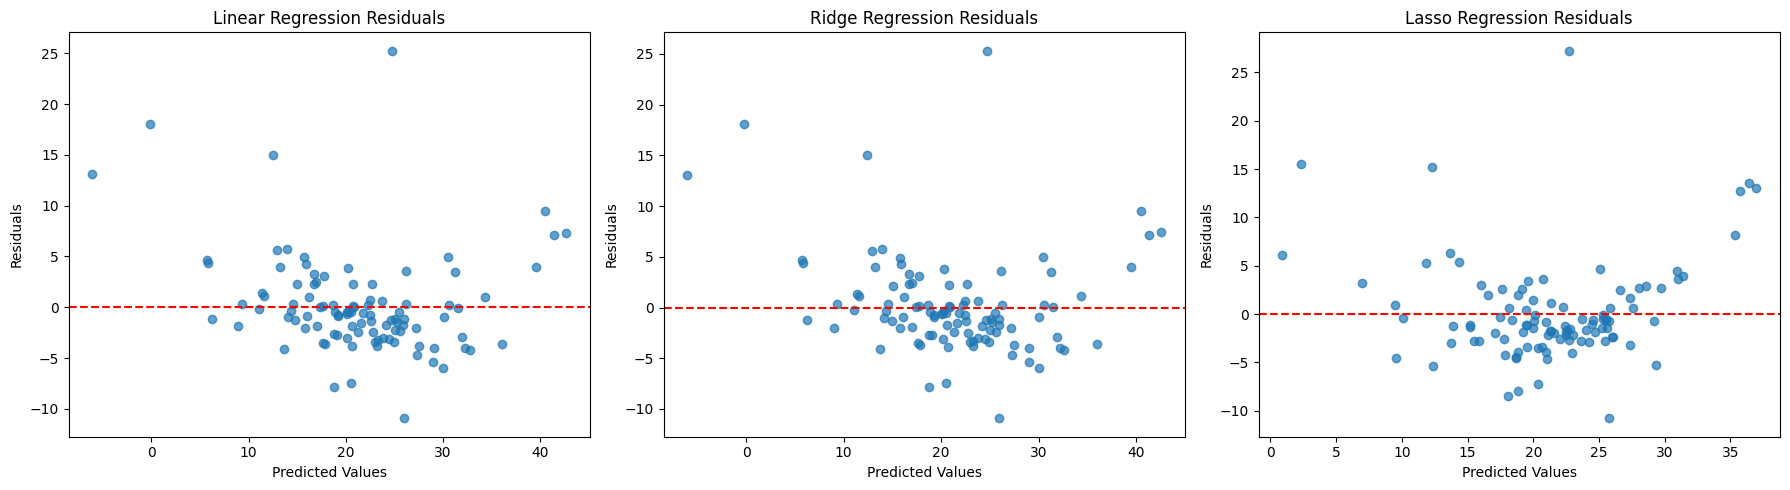

In [ ]:
# Calculate residuals
residuals_linear = y_test - y_pred_linear
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual plot for Linear Regression
axes[0].scatter(y_pred_linear, residuals_linear, alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Linear Regression Residuals')

# Residual plot for Ridge Regression
axes[1].scatter(y_pred_ridge, residuals_ridge, alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Ridge Regression Residuals')

# Residual plot for Lasso Regression
axes[2].scatter(y_pred_lasso, residuals_lasso, alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Lasso Regression Residuals')

plt.tight_layout()
plt.show()

Final Results Table

In [ ]:
# Format the results for better readability
formatted_results = results_df.copy()
formatted_results['MSE'] = formatted_results['MSE'].round(2)
formatted_results['RMSE'] = formatted_results['RMSE'].round(2)
formatted_results['R²'] = formatted_results['R²'].round(4)
formatted_results['MAE'] = formatted_results['MAE'].round(2)

print("Final Model Comparison:")
formatted_results

Final Model Comparison:


,Model,MSE,RMSE,R²,MAE
0,Linear Regression,24.29,4.93,0.6688,3.19
1,Ridge Regression,24.31,4.93,0.6685,3.19
2,Lasso Regression,27.58,5.25,0.6239,3.47
